In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d
import torch
import h5py
from io import StringIO
import matplotlib.patches as patches
from skimage.measure import regionprops
from skimage import filters
from numpy import linalg
import scipy

In [63]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre
def forwardproj(pcd, pr):
    pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
    pcd2 = np.matmul(pcd2,pr.T)
    pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
    return(pcd2[:,:3])
def getcenf(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]]), -linalg.det(el[:,[0,1,2]])]
    return centre
def sf(dirname):
    return('./'+dirname+'/'+str(int(os.listdir('./'+dirname+'/')[-1].replace('.png',''))+1).zfill(3)+'.png')

In [3]:
getcen(prmat[:3,:])

NameError: name 'prmat' is not defined

In [306]:
pcdw = np.asarray(open3d.io.read_point_cloud('C:/Users/v.cherepashkin/Downloads/Telegram Desktop/1494452.ply').points)

In [307]:
np.min(pcdw,axis=0)

array([88., 20., 92.])

In [308]:
np.max(pcdw,axis=0)

array([152.,  92., 223.])

In [309]:
np.mean(pcdw,axis=0)

array([121.60008325,  55.4128657 , 153.82834777])

In [4]:
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','')\
           for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4

In [6]:
angle = 0
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

In [295]:
prmat[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [23]:
for i in range(36):
    print(getcen(prmat[4*i:4*(i+1)-1,:]))

[   99.5953582     45.69547294 -2382.76923077]
[ -334.39988575    45.70332026 -2339.96842306]
[ -753.42156938    45.72662647 -2223.0933998 ]
[-1146.47557544    45.76467638 -2035.36763362]
[-1501.21465267    45.81634392 -1782.50311619]
[-1806.98888458    45.88001436 -1472.03365053]
[-2054.40089592    45.95377659 -1113.50899775]
[-2236.08386099    46.03540675  -717.73056896]
[-2346.73619007    46.12237743  -296.01797137]
[-2382.76923077    46.21209212   139.39986194]
[-2342.81338303    46.30181093   574.26460677]
[-2227.95394408    46.38878324   996.06723179]
[-2041.45174839    46.47039845  1391.93757943]
[-1788.87149579    46.54417647  1749.62513309]
[-1477.36972053    46.60785331  2058.51143705]
[-1116.94982315    46.65950242  2308.41409872]
[-718.37567165   46.69755254 2491.84897162]
[-293.59658653   46.72086443 2603.16313338]
[ 144.18039299   46.7287113  2638.76923077]
[ 581.83991276   46.72086109 2597.47784001]
[1005.74610383   46.69755156 2480.43124128]
[1402.71151785   46.65950239

In [25]:
prmat[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [24]:
prmat[:3,3]

array([-1.8263947e+05, -9.8688500e+04, -1.2100000e+02])

In [30]:
-np.matmul(linalg.inv(prmat[:3,:3]),prmat[:3,3])

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [289]:
scipy.linalg.rq(prmat[:3,:3])

(array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01],
        [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01],
        [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02]]),
 array([[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]]))

In [296]:
with np.printoptions(precision=0, suppress=True):
    print(prmat[:4,:])
    print(scipy.linalg.rq(prmat[:3,:3]))

[[    740.       0.     -46. -182639.]
 [      0.     740.     -27.  -98688.]
 [      0.       0.      -0.    -121.]
 [      0.       0.      -0.    -121.]]
(array([[740.,   0., -46.],
       [  0., 740., -27.],
       [  0.,   0.,  -0.]]), array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [-0., -0.,  1.]]))


In [299]:
r[2,2]

0.05078124926452389

In [294]:
cr

array([  534.28230177,    46.03989244, -2349.86334207])

In [28]:
for i in range(36):
    print(-np.matmul(linalg.inv(prmat[4*i:4*(i+1)-1,:3]),prmat[4*i:4*(i+1)-1,3]))

[   99.5953582     45.69547294 -2382.76923077]
[ -334.39988575    45.70332026 -2339.96842306]
[ -753.42156938    45.72662647 -2223.0933998 ]
[-1146.47557544    45.76467638 -2035.36763362]
[-1501.21465267    45.81634392 -1782.50311619]
[-1806.98888458    45.88001436 -1472.03365053]
[-2054.40089592    45.95377659 -1113.50899775]
[-2236.08386099    46.03540675  -717.73056896]
[-2346.73619007    46.12237743  -296.01797137]
[-2382.76923077    46.21209212   139.39986194]
[-2342.81338303    46.30181093   574.26460677]
[-2227.95394408    46.38878324   996.06723179]
[-2041.45174839    46.47039845  1391.93757943]
[-1788.87149579    46.54417647  1749.62513309]
[-1477.36972053    46.60785331  2058.51143705]
[-1116.94982315    46.65950242  2308.41409872]
[-718.37567165   46.69755254 2491.84897162]
[-293.59658653   46.72086443 2603.16313338]
[ 144.18039299   46.7287113  2638.76923077]
[ 581.83991276   46.72086109 2597.47784001]
[1005.74610383   46.69755156 2480.43124128]
[1402.71151785   46.65950239

In [79]:
centres = np.zeros([3,36])
for i in range(36):
    centres[:,i] = -np.matmul(linalg.inv(prmat[4*i:4*(i+1)-1,:3]),prmat[4*i:4*(i+1)-1,3])

In [286]:
np.mean(centres, axis=1)

array([124.93484205,  46.29171594, 122.4699606 ])

In [288]:
np.mean(pcd,axis=0)

array([121.10617155,  56.74105373, 158.76739705])

In [302]:
np.mean(centres, axis=1)

array([124.93484205,  46.29171594, 122.4699606 ])

In [303]:
centres

array([[   99.5953582 ,  -334.39988575,  -753.42156938, -1146.47557544,
        -1501.21465267, -1806.98888458, -2054.40089592, -2236.08386099,
        -2346.73619007, -2382.76923077, -2342.81338303, -2227.95394408,
        -2041.45174839, -1788.87149579, -1477.36972053, -1116.94982315,
         -718.37567165,  -293.59658653,   144.18039299,   581.83991276,
         1005.74610383,  1402.71151785,  1760.70067952,  2068.52588434,
         2316.71175137,  2497.89346797,  2606.24032278,  2638.76923077,
         2594.59741366,  2475.35541164,  2284.77795518,  2028.77903823,
         1715.47852691,  1354.58637864,   956.75578428,   534.28230177],
       [   45.69547294,    45.70332026,    45.72662647,    45.76467638,
           45.81634392,    45.88001436,    45.95377659,    46.03540675,
           46.12237743,    46.21209212,    46.30181093,    46.38878324,
           46.47039845,    46.54417647,    46.60785331,    46.65950242,
           46.69755254,    46.72086443,    46.7287113 ,    46.7

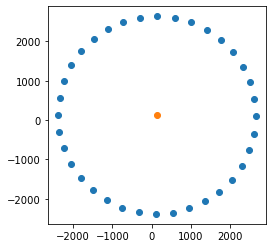

In [92]:
fig, ax = plt.subplots(1,1)
ax.scatter(centres[0,:], centres[2,:])
ax.scatter(np.mean(centres, axis=1)[0], np.mean(centres, axis=1)[2])
ax.set_aspect('equal', adjustable='box')

In [305]:
np.array([[740.,   0., -46.],
      [0., 740., -27.], 
      [0., 0., 0.05]])

array([[ 7.4e+02,  0.0e+00, -4.6e+01],
       [ 0.0e+00,  7.4e+02, -2.7e+01],
       [ 0.0e+00,  0.0e+00,  5.0e-02]])

In [108]:
with np.printoptions(precision=2, suppress=True):
    for i in range(36):
        d = centres[:,i] - np.mean(centres, axis=1)
#         print(linalg.norm((d[0], d[2])))
        radi[i] = linalg.norm((d[0], d[2]))
#         print(np.abs(centres[:,i] - np.mean(centres, axis=1)))

In [100]:
i = 0
radi = np.array([np.abs(centres[:,i] - np.mean(centres, axis=1)) for i in range(36)])

In [118]:
np.mean(centres, axis=1).shape

(3,)

In [117]:
forwardproj(np.mean(centres, axis=1), prmat[:4,:4])

AxisError: axis 1 is out of bounds for array of dimension 1

In [128]:
def fp2(pcd, pr):
#     print(pcd.shape)
    pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
    pcd2 = np.matmul(pcd2,pr.T)
    pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
    return(pcd2[:,:3])

In [129]:
fp2(np.expand_dims(np.mean(centres, axis=1),axis=0), prmat[:4,:4])

array([[752.52918028, 532.52998284,   1.        ]])

In [110]:
np.mean(np.array([137, 106, 140]))

127.66666666666667

In [111]:
5.823/140

0.04159285714285715

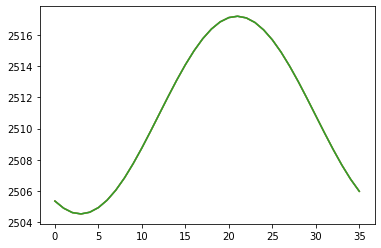

In [109]:
plt.plot(radi)

In [114]:
np.mean(radi)

2510.873365496584

In [113]:
np.mean(radi)*0.05

125.5436682748292

In [96]:
from scipy import optimize
from math import sqrt
method_2 = "leastsq"

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

# center_estimate = centres[0,:], centres[2,:]
center_estimate = np.mean(centres, axis=1)[0], np.mean(centres, axis=1)[2]
center_2, ier = optimize.leastsq(f_2, center_estimate)
print(center_2.shape)
xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

NameError: name 'x' is not defined

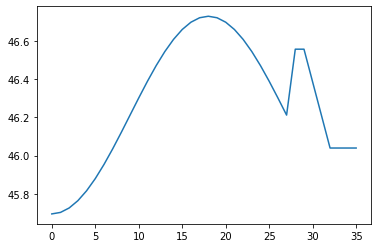

In [81]:
plt.scatter(centres[1,:])

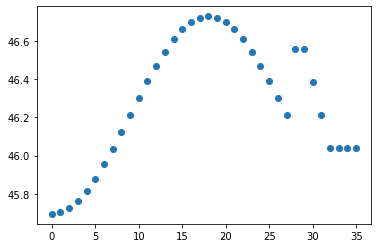

In [83]:
plt.scatter(np.arange(36),centres[1,:])

In [8]:
np.matmul(prmat[:3,:3],getcen(prmat[:3,:]))

array([1.8263947e+05, 9.8688500e+04, 1.2100000e+02])

In [12]:
np.matmul(prmat[:4,:],np.hstack((getcen(prmat[:3,:]),1)))

array([-1.89174898e-10, -5.82076609e-11, -5.68434189e-14, -5.68434189e-14])

In [19]:
np.matmul(prmat[:4,:],getcenf(prmat[:3,:]))/np.matmul(prmat[:4,:],getcenf(prmat[:3,:]))[3]

array([3.58400000e+03, 1.10933333e+03, 1.00000000e+00, 1.00000000e+00])

In [16]:
linalg.det(prmat[:3,[0,1,2]])

-27837.178534739705

# view all projections in 3d and correspondings prmat centres

In [77]:
-np.matmul(linalg.inv(M[:3,:3]),M[:3,3])

array([  534.28230177,    46.03989244, -2349.86334207])

In [72]:
scipy.linalg.rq(prmat[:3,:3])[0][2,2]

-0.05078125

In [220]:
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
pcda = np.zeros([1,3])
pcdc = np.zeros([1,3])
for angle in [31, 35]:
    M = prmat[4*angle:4*(angle+1),:]
    centre = -np.matmul(linalg.inv(M[:3,:3]),M[:3,3])
    print(centre)
    pm = np.matmul(linalg.inv(M[:3,:3]),(-15*np.array([695, 998, 1])-M[3,:3]))
    prc = np.matmul(np.matmul(E,M.T),linalg.pinv(np.matmul(E,prmat[:4,:].T)))
    pcda = np.vstack((pcda,np.matmul(pcd,prc.T)[::100,:]))
    pcda = np.vstack((pcda,np.mean(np.matmul(pcd,prc.T),axis=0)))
    pcdc = np.vstack((pcda,scipy.linalg.rq(prmat[:3,:3])[0][2,2]*forwardproj(pcd,M)[::100,:]))

pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcda)

pcdd = open3d.geometry.PointCloud()
pcdd.points = open3d.utility.Vector3dVector(pcdc)

mesh_sphere = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_sphere.transform(np.asarray(
                [
                [1, 0, 0, pm[0]],
                [0, 1, 0, pm[1]],
                [0, 0, 1, pm[2]],
                [0, 0, 0, 1]]))
mesh_sphere2 = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere2.compute_vertex_normals()
mesh_sphere2.paint_uniform_color([0.1, 0.4, 0.7])
mesh_sphere2.transform(np.asarray(
                [
                [1, 0, 0, centre[0]],
                [0, 1, 0, centre[1]],
                [0, 0, 1, centre[2]],
                [0, 0, 0, 1]]))
points = [
    [0, 0, 0],
    [pm[0], pm[1], pm[2]]
]
lines = [
    [0, 1]
]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = open3d.geometry.LineSet(
    points=open3d.utility.Vector3dVector(points),
    lines=open3d.utility.Vector2iVector(lines),
)
line_set.colors = open3d.utility.Vector3dVector(colors)
open3d.visualization.draw_geometries([pcdb, mesh_sphere, mesh_sphere2, line_set])


[ 2028.77903823    46.21210276 -1512.80341327]
[  534.28230177    46.03989244 -2349.86334207]


## 2d projections in 3d

In [64]:
forwardproj(pcd,M).shape

(36328, 3)

In [65]:
forwardproj(pcd,M)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [43]:
pcd[:,3]

IndexError: index 3 is out of bounds for axis 1 with size 3

In [218]:
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
pcda = np.zeros([1,3])
# for angle in [0, 6, 12, 18, 24, 30]:
for angle in range(36):
    M = prmat[4*angle:4*(angle+1),:]
#     pcd2 = forwardproj(pcd,M)
#     centre = np.matmul(linalg.inv(M[:3,:3]),M[3,:3])
#     print(centre)
#     pm = np.matmul(linalg.inv(M[:3,:3]),(-15*np.array([695, 998, 1])-M[3,:3]))
#     prc = np.matmul(np.matmul(E,M.T),linalg.pinv(np.matmul(E,prmat[:4,:].T)))
    pcda = np.vstack((pcda,forwardproj(pcd,M)[::100,:]))
#     pcda = np.vstack((pcda,np.mean(np.matmul(pcd,prc.T),axis=0)))
pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcda)
mesh_sphere = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_sphere.transform(np.asarray(
                [
                [1, 0, 0, pm[0]],
                [0, 1, 0, pm[1]],
                [0, 0, 1, pm[2]],
                [0, 0, 0, 1]]))
mesh_sphere2 = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere2.compute_vertex_normals()
mesh_sphere2.paint_uniform_color([0.1, 0.4, 0.7])
mesh_sphere2.transform(np.asarray(
                [
                [1, 0, 0, centre[0]],
                [0, 1, 0, centre[1]],
                [0, 0, 1, centre[2]],
                [0, 0, 0, 1]]))
points = [
    [0, 0, 0],
    [pm[0], pm[1], pm[2]]
]
lines = [
    [0, 1]
]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = open3d.geometry.LineSet(
    points=open3d.utility.Vector3dVector(points),
    lines=open3d.utility.Vector2iVector(lines),
)
line_set.colors = open3d.utility.Vector3dVector(colors)
open3d.visualization.draw_geometries([pcdb, mesh_sphere, mesh_sphere2, line_set])


# project origin of the camera circle to the image plain

In [318]:
cms = [h//2, w//2]

In [319]:
cms

[500, 900.0]

In [320]:
1800//2

900

In [314]:
cms[0] - new_h//2

150.0

(36328, 4)
[121.10617155  56.74105373 158.76739705   1.        ]


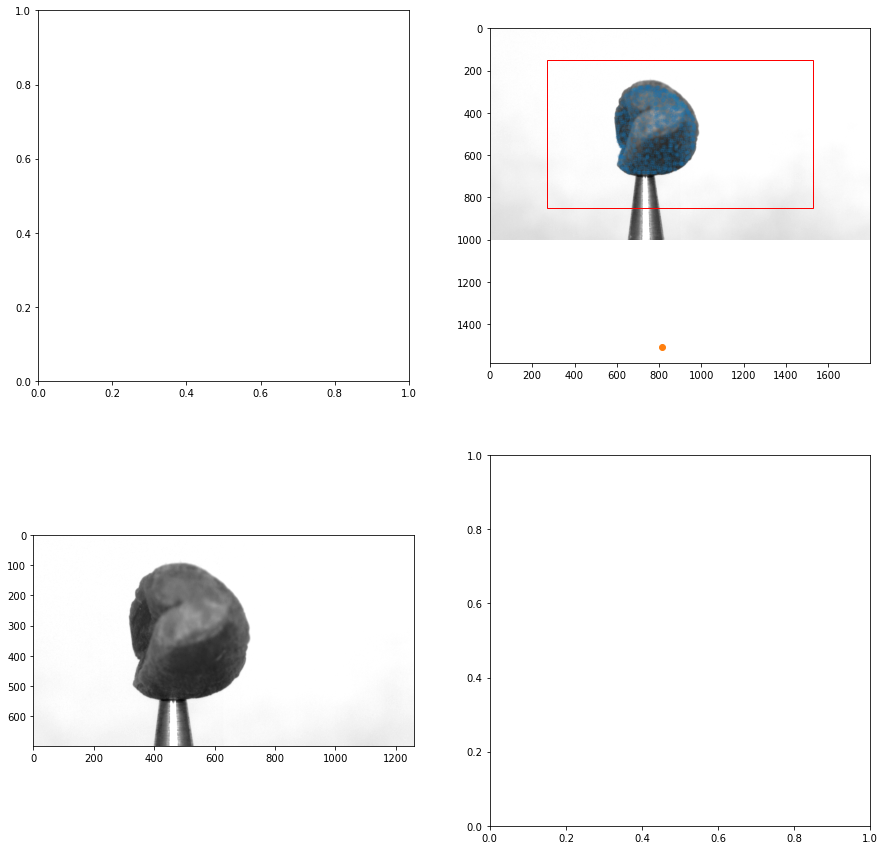

In [332]:
h = 1000
hc = 700
hn = 250
angle = 0
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
# cv = np.array([wc/2-cms[1], hc/2-cms[0], 0, 0])
mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
new_h = 700
new_w = 1260
img0 = 255-img
# properties = regionprops(
#     (img0 > filters.threshold_otsu(img0)).astype(int), img0)
# cms = tuple(map(lambda x: int(x), properties[0].centroid))
cms = [int(h/2), int(w/2)]
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
pr0 = prmat[angle*4:4*(angle+1),:]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
print(pcd1.shape)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
# delta2 = np.matmul(linalg.inv(pr0[:3,:3]), (-135*np.array([cv[0], cv[1], 0, 0]))[:3])
# pcd2 = pcd+np.repeat(np.expand_dims(delta2, axis=0), pcd.shape[0], axis=0)
# pcd2 = np.concatenate((pcd2, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
# pcd2 = np.matmul(pcd2,pr0.T)
# pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
# a1.scatter(cms[1],cms[0])
# a1.scatter(1800/2,1000/2)
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
# cp = np.squeeze(fp2(np.expand_dims(np.mean(centres, axis=1),axis=0), prmat[:4,:4]))
# print(cp)
# a1.scatter(cp[0], cp[1])
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4])-[r2[0,2], r2[1,2], 0])
tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4]))
a1.scatter(tip[1], tip[0])
a2.imshow(tempb, cmap='gray')
# a2.imshow(tempa, cmap='gray')
# a2.scatter(wc/2,hc/2)
# a2.scatter(wc/2-(cms[1]-w/2),hc/2-(cms[0]-h/2))
# a2.scatter(pcd2[::25,0],pcd2[::25,1], s=10, alpha = 0.1)
# a3.imshow(new_img, cmap='gray')
# a3.scatter(450/2,250/2, s=20)
# a3.scatter(wn/2-(cms[1]-w/2)*k,hn/2-(cms[0]-h/2)*k, s=20)
# a3.scatter((pcd1[0,:]-(cms[1]-wc/2))*k,(pcd1[1,:]-(cms[0]-hc/2))*k, s=10, alpha=0.1)

In [139]:
np.min(pcd,axis=0)

array([88., 20., 92.])

In [140]:
np.max(pcd,axis=0)

array([152.,  92., 223.])

In [141]:
np.mean(pcd,axis=0)

array([121.10617155,  56.74105373, 158.76739705])

In [151]:
with np.printoptions(precision=2, suppress=True):
    print(forwardproj(np.array([[0,0,0]]),prmat[:4,:4])-[r2[0,2], r2[1,2], 0])

[[609.42 279.61   1.  ]]


In [163]:
with np.printoptions(precision=3, suppress=True):
    nulls = np.zeros([3,36])
    for i in range(36):
        nulls[:,i] = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[4*i:4*(i+1),:]))

In [324]:
nulls

array([[ 1.50941711e+03,  1.37527461e+03,  1.22529770e+03,
         1.05483607e+03,  8.73559733e+02,  6.88117331e+02,
         5.07566184e+02,  3.38724185e+02,  1.84198530e+02,
         4.70218876e+01, -6.14129722e+01, -1.42121821e+02,
        -1.93106775e+02, -2.12794040e+02, -2.04832855e+02,
        -1.65444846e+02, -9.86294920e+01, -8.38387516e+00,
         1.03359612e+02,  2.31311612e+02,  3.72716276e+02,
         5.24491948e+02,  6.81493876e+02,  8.40796924e+02,
         9.98844838e+02,  1.14898573e+03,  1.29200184e+03,
         1.42208537e+03,  1.53331178e+03,  1.62687360e+03,
         1.69596436e+03,  1.73790592e+03,  1.75230957e+03,
         1.73789280e+03,  1.69155529e+03,  1.61548444e+03],
       [ 8.15607438e+02,  8.18056325e+02,  8.20097381e+02,
         8.21647429e+02,  8.22642269e+02,  8.23040613e+02,
         8.22827728e+02,  8.22015819e+02,  8.20642520e+02,
         8.18768595e+02,  8.16472370e+02,  8.13844779e+02,
         8.10984150e+02,  8.07990428e+02,  8.04961030e+

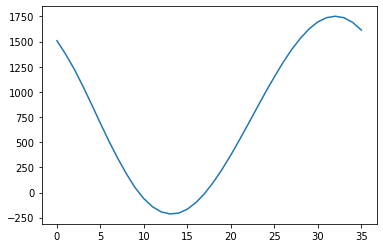

In [164]:
plt.plot(nulls[0,:])

In [328]:
nulls[:,0]

array([1.50941711e+03, 8.15607438e+02, 1.00000000e+00])

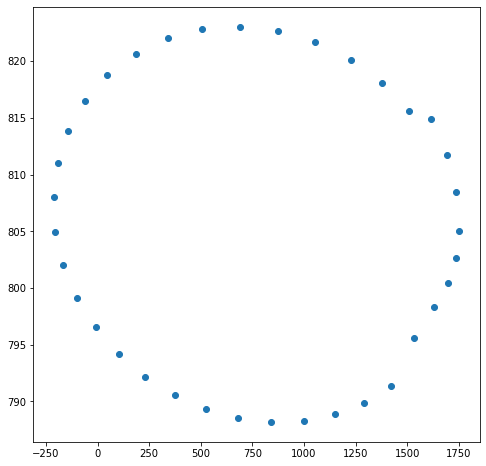

In [325]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(nulls[0,:],nulls[1,:])
fig.savefig(sf('figs'))
# ax.set_aspect('equal', adjustable='box')

In [146]:
r = scipy.linalg.rq(prmat[:3,:3])[0]
# q = scipy.linalg.rq(prmat[:3,:3])[1]

In [173]:
offsets = np.zeros([2,36])
for i in range(36):
    r = scipy.linalg.rq(prmat[4*i:4*(i+1)-1,:3])[0]
    r2 = r/r[2,2]
    offsets[:,i] = [r2[0,2], r2[1,2]]
# q = scipy.linalg.rq(prmat[:3,:3])[1]

In [214]:
# offsets = np.zeros([2,36])
sign = np.zeros(36)
for i in range(36):
    r = scipy.linalg.rq(prmat[4*i:4*(i+1)-1,:3])[0]
#     r2 = r/r[2,2]
    sign[i] = r[2,2]
#     print(r[2,2])
#     offsets[:,i] = [r2[0,2], r2[1,2]]
# q = scipy.linalg.rq(prmat[:3,:3])[1]

In [217]:
# offsets = np.zeros([2,36])
# sign = np.zeros(36)
for i in range(36):
    r = scipy.linalg.rq(prmat[4*i:4*(i+1)-1,:3])[0]
    r2 = r/r[2,2]
    print(r2[0,0])
#     sign[i] = r[2,2]
#     print(r[2,2])
#     offsets[:,i] = [r2[0,2], r2[1,2]]
# q = scipy.linalg.rq(prmat[:3,:3])[1]

-14580.000098461538
14580.000549995573
14579.99966202913
14579.999853642794
14580.000182456384
14579.998860911412
14579.999696697607
14580.000460276107
14579.999818089087
14580.000098461538
14580.000549995571
14579.99966202913
14579.999853642794
14580.000182456384
14579.998860911415
14579.999696697607
14580.00046027611
14579.999818089089
14580.000098461538
14580.000549995573
14579.99966202913
14579.999853642794
14580.000182456384
14579.998860911412
14579.999696697607
14580.000460276107
14579.999818089087
14580.000098461538
14580.000549995571
14579.99966202913
14579.999853642794
14580.000182456384
14579.998860911415
14579.999696697607
14580.00046027611
14579.999818089089


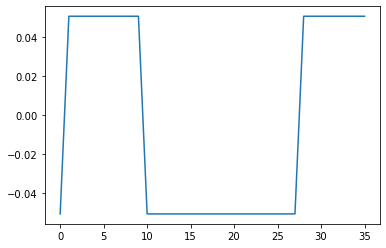

In [216]:
plt.plot(np.arange(36),sign)
plt.savefig(sf('figs'))

In [205]:
def sf(dirname):
    return('./'+dirname+'/'+str(int(os.listdir('./'+dirname+'/')[-1].replace('.png',''))+1).zfill(3)+'.png')

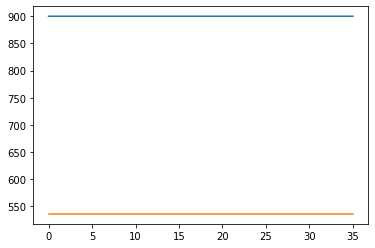

In [209]:
plt.plot(offsets[0,:])
plt.plot(offsets[1,:])
# plt.savefig(sf('figs'))
# dirname = dir1+'/'+n.zfill(3)+'/'

In [195]:
lst = os.listdir('./figs/')

In [193]:
lst2 = lst.sort()

In [194]:
lst2

In [202]:
'./figs/'+str(int(os.listdir('./figs/')[-1].replace('.png',''))+1).zfill(3)+'.png'

'./figs/003.png'

In [ ]:
def newfold(dir1):
    i = 0
    while True:
        n = str(i)
        dirname = dir1+'/'+n.zfill(3)+'/'
        if not os.path.exists(dirname):
            os.mkdir(dirname)
            break
        else:
            i += 1
            continue
    return(dirname)

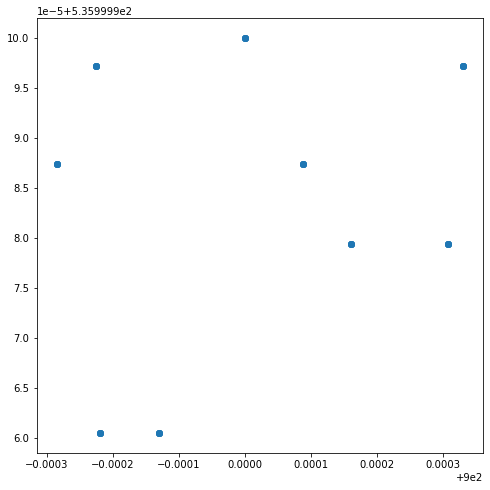

In [174]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(offsets[0,:],offsets[1,:])
# ax.set_aspect('equal', adjustable='box')

In [147]:
r2 = r/r[2,2]

In [150]:
r2[0,2]

900.0

In [155]:
r2[1,2]

536.0

# simulate real experiment, where seed is moving nearly around needle tip, and camera is fixed

In [243]:
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
pcda = np.zeros([1,3])
pcdc = np.zeros([1,3])
for angle in [0, 12,24]:
    M = prmat[4*angle:4*(angle+1),:]
    centre = -np.matmul(linalg.inv(M[:3,:3]),M[:3,3])
    print(centre)
    pm = np.matmul(linalg.inv(M[:3,:3]),(-15*np.array([695, 998, 1])-M[3,:3]))
    prc = np.matmul(np.matmul(E,M.T),linalg.pinv(np.matmul(E,prmat[:4,:].T)))
    pcda = np.vstack((pcda,np.matmul(pcd,prc.T)[::100,:]))
    pcda = np.vstack((pcda,np.mean(np.matmul(pcd,prc.T),axis=0)))
#     pcdc = np.vstack((pcda,scipy.linalg.rq(prmat[:3,:3])[0][2,2]*forwardproj(pcd,M)[::100,:]))

pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcda)

# pcdd = open3d.geometry.PointCloud()
# pcdd.points = open3d.utility.Vector3dVector(pcdc)

mesh_sphere = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_sphere.transform(np.asarray(
                [
                [1, 0, 0, pm[0]],
                [0, 1, 0, pm[1]],
                [0, 0, 1, pm[2]],
                [0, 0, 0, 1]]))
mesh_sphere2 = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere2.compute_vertex_normals()
mesh_sphere2.paint_uniform_color([0.1, 0.4, 0.7])
mesh_sphere2.transform(np.asarray(
                [
                [1, 0, 0, centre[0]],
                [0, 1, 0, centre[1]],
                [0, 0, 1, centre[2]],
                [0, 0, 0, 1]]))
points = [
    [0, 0, 0],
    [pm[0], pm[1], pm[2]]
]
lines = [
    [0, 1]
]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = open3d.geometry.LineSet(
    points=open3d.utility.Vector3dVector(points),
    lines=open3d.utility.Vector2iVector(lines),
)
line_set.colors = open3d.utility.Vector3dVector(colors)
open3d.visualization.draw_geometries([pcdb, mesh_sphere, mesh_sphere2, line_set])


[   99.5953582     45.69547294 -2382.76923077]
[-2041.45174839    46.47039845  1391.93757943]
[2316.71175137   46.47041306 1358.57786703]


In [238]:
type(cr)

numpy.ndarray

In [242]:
list([cr,cr])

[array([   99.5953582 ,    45.69547294, -2382.76923077]),
 array([   99.5953582 ,    45.69547294, -2382.76923077])]

In [246]:
M[:3,2]

array([-45.703125  , -27.21875   ,  -0.05078125])

In [254]:
for i in [0, 12]:
    M = prmat[4*i:4*(i+1),:]
    print(-np.matmul(linalg.inv(M[:3,:3]),M[:3,3]))

[   99.5953582     45.69547294 -2382.76923077]
[-2041.45174839    46.47039845  1391.93757943]


In [270]:
np.vstack((np.array([2*i for i in range(4)]), np.array([2*i+1 for i in range(4)]))).T.tolist()

[[0, 1], [2, 3], [4, 5], [6, 7]]

In [260]:
[
    [0, 1],
    [2, 3]
]

[[0, 1], [2, 3]]

In [259]:
[[2*i for i in range(36*2)], [2*i+1 for i in range(36*2)]]

[[0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  78,
  80,
  82,
  84,
  86,
  88,
  90,
  92,
  94,
  96,
  98,
  100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142],
 [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49,
  51,
  53,
  55,
  57,
  59,
  61,
  63,
  65,
  67,
  69,
  71,
  73,
  75,
  77,
  79,
  81,
  83,
  85,
  87,
  89,
  91,
  93,
  95,
  97,
  99,
  101,
  103,
  105,
  107,
  109,
  111,
  113,
  115,
  117,
  119,
  121,
  123,
  125,
  127,
  129,
  131,
  133,
  135,
  137,
  139,
  141,
  143]]

In [283]:
r[0,0]

740.390605039095

In [285]:
pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcd)
# /0.05078124926452389
mu = 2
cr = []
points = []
cam = range(36)
for i in cam:
    M = prmat[4*i:4*(i+1),:]
    cr = -np.matmul(linalg.inv(M[:3,:3]),M[:3,3])
    pn = cr + mu*(M[:3,2]-cr)
    points.append(list(cr))
    points.append(list(pn))
#     print(cr[0])
#     print(type(list(cr[0])))
#     M[:3,2]
#     print(np.squeeze(forwardproj(np.expand_dims(centre, axis=0),prmat[:4,:])))
#     print(centre)
points.append(pn)
# points = [
#     list(pn),
#     list(cr[0]),
#     list(cr[1])
# ]
# lines = [
#     [0, 1],
#     [2, 3]
# ]
lines = np.vstack((np.array([2*i for i in range(len(cam))]), np.array([2*i+1 for i in range(len(cam))]))).T.tolist()
# lines = [[2*i for i in range(36*2)], [2*i+1 for i in range(36*2)]]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = open3d.geometry.LineSet(
    points=open3d.utility.Vector3dVector(points),
    lines=open3d.utility.Vector2iVector(lines),
)    
mesh_sphere = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_sphere.transform(np.asarray(
                [
                [1, 0, 0, cr[0]],
                [0, 1, 0, cr[1]],
                [0, 0, 1, cr[2]],
                [0, 0, 0, 1]]))
open3d.visualization.draw_geometries([pcdb, mesh_sphere, line_set])


In [277]:
r[2,2]

0.05078124926452389

In [235]:
M = prmat[4*i:4*(i+1),:]
centre = -np.matmul(linalg.inv(M[:3,:3]),M[:3,3]) 
print(M,M[:3,2])

[[ 7.4039063e+02  0.0000000e+00 -4.5703125e+01 -1.8263947e+05]
 [ 0.0000000e+00  7.4039063e+02 -2.7218750e+01 -9.8688500e+04]
 [ 0.0000000e+00  0.0000000e+00 -5.0781250e-02 -1.2100000e+02]
 [ 0.0000000e+00  0.0000000e+00 -5.0781250e-02 -1.2100000e+02]] [-45.703125   -27.21875     -0.05078125]


In [232]:
centre

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [227]:
-np.matmul(linalg.inv(M[:3,:3]),M[:3,3]) 

array([2316.71175137,   46.47041306, 1358.57786703])

In [301]:
152-88, 92-20, 223-92

(64, 72, 131)